# Vergleich der Optimizer
In diesem Notebook wird das gleiche CNN mit den Optimizern aus den letzten Notebooks trainiert und die Ergebnisse verglichen. Das CNN ist das gleiche, das schon bei der Anwendung von MNIST genutzt wurde.

In [3]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = load_data() # Load data

def scaleBetweenMinus1And1(x):
    mean = np.mean(x)
    maxVal = np.max(x)
    minVal = np.min(x)
    return (x - mean)/(maxVal - minVal)

x_train = scaleBetweenMinus1And1(x_train) # Prepare data
x_test = scaleBetweenMinus1And1(x_test)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

filter_count = 8
kernel_size = 3
pooling_size = 2

def createModel():
    return Sequential([
        Conv2D(filter_count, kernel_size, input_shape=(28, 28, 1), activation='relu'),
        MaxPooling2D(pool_size=pooling_size),
        Flatten(),
        Dense(10, activation='softmax'),
    ])

modelAdagrad = createModel()
modelAdadelta = createModel()
modelRMSProp = createModel()
modelAdam = createModel()
modelSGD = createModel()

modelAdagrad.compile(
  'adagrad',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

modelAdadelta.compile(
  'adadelta',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

modelRMSProp.compile(
  'rmsprop',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

modelAdam.compile(
  'adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

modelSGD.compile(
  'sgd',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

histAdagrad = modelAdagrad.fit(
  x_train,
  to_categorical(y_train),
  epochs=4,
  validation_data=(x_test, to_categorical(y_test)),
)

histAdadelta = modelAdadelta.fit(
  x_train,
  to_categorical(y_train),
  epochs=4,
  validation_data=(x_test, to_categorical(y_test)),
)

histRMSProp = modelRMSProp.fit(
  x_train,
  to_categorical(y_train),
  epochs=4,
  validation_data=(x_test, to_categorical(y_test)),
)

histAdam = modelAdam.fit(
  x_train,
  to_categorical(y_train),
  epochs=4,
  validation_data=(x_test, to_categorical(y_test)),
)

histSGD = modelSGD.fit(
  x_train,
  to_categorical(y_train),
  epochs=4,
  validation_data=(x_test, to_categorical(y_test)),
)

Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Epoch 1/4
60000/60000 [==============================] - 23s 389us/sample - loss: 1.1097 - acc: 0.8010 - val_loss: 0.6747 - val_acc: 0.8605
Epoch 2/4
60000/60000 [==============================] - 22s 359us/sample - loss: 0.5872 - acc: 0.8643 - val_loss: 0.4987 - val_acc: 0.8865
Epoch 3/4
60000/60000 [==============================] - 21s 350us/sample - loss: 0.4777 - acc: 0.8806 - val_loss: 0.4311 - val_acc: 0.8953
Epoch 4/4
60000/60000 [==============================] - 22s 361us/sample - loss: 0.4267 - acc: 0.8891 - val_loss: 0.3941 - val_acc: 0.9032
Train on 60000 samples, validate on 10000 samples
Epoch 1/4
60000/60000 [==============================] - 23s 376us/sample - loss: 2.2866 - acc: 0.1734 - val_loss: 2.2699 - val_acc: 0.2091
Epoch 2/4
60000/60000 [==============================] - 21s 354us/sample - loss: 

Im Folgenden wird ein Diagramm aus dem zeitlichen Verlauf der Accuracy der Modelle erstellt.

<Figure size 432x288 with 0 Axes>

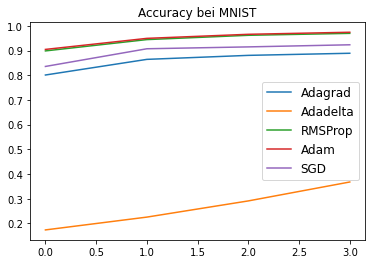

In [4]:
plt.clf()
fig,ax = plt.subplots()
ax.plot(histAdagrad.history['acc'], label="Adagrad")
ax.plot(histAdadelta.history['acc'], label="Adadelta")
ax.plot(histRMSProp.history['acc'], label="RMSProp")
ax.plot(histAdam.history['acc'], label="Adam")
ax.plot(histSGD.history['acc'], label="SGD")
plt.legend(prop={'size': 12})
plt.title("Accuracy bei MNIST")
plt.show()

Aus dem Diagramm ist abzulesen, dass Adadelta sehr viel langsamer konvergiert als die anderen Optimizer. Adagrad und SGD schneiden schlechter ab als RMSProp und Adam, die beide fast das gleiche Verhalten zeigen. SGD hat ein leicht besseres Ergebnis als Adagrad.